The below code tests the defined 'rover_goal' function, which returns the direction of 'left' or 'right' that indicate the rover should turn according to the worlmap. If we assume that the groundtruth is previously known, the result can be much more accurate, but it's cheating! Due to time constraints, debugging results are not ideal, but the function does make the mapping result better in the project！

(200, 200) <class 'numpy.ndarray'>


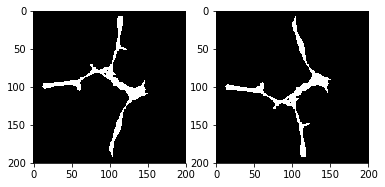

In [19]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np

ground_truth = mpimg.imread('../calibration_images/map_bw.png')
ground_truth_flip = np.flipud(ground_truth)

print(ground_truth.shape, type(ground_truth))

#fig = plt.figure(figsize=(12,3))
plt.subplot(121)
plt.imshow(ground_truth, cmap='gray')
plt.subplot(122)
plt.imshow(ground_truth_flip, cmap='gray')

Now we assume that the rover is at the position of (105, 140), and plot it as a small blue point on the map.

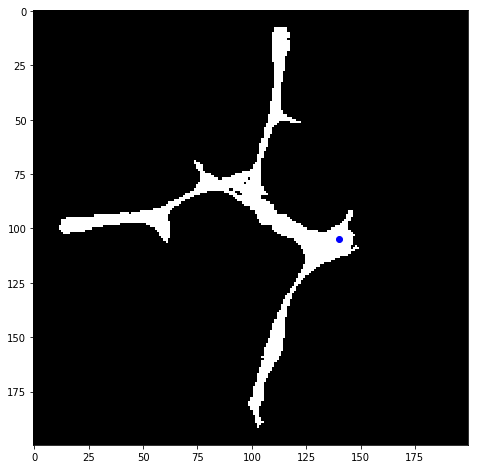

In [20]:
# assume that rover is at (105, 140) 
fig = plt.figure(figsize=(8,8))
plt.imshow(ground_truth,  cmap='gray')
plt.scatter(140, 105, c = 'b')

I use *maped* to represent the maped world, with is consistant with worldmap[:,:,2] in the project. And I also assume that the yaw angle of the rover is *pi * 5/4*. The yaw angle is ploted as a red arrow. According to our judgement, the rover should drive in areas with less mapping area. Therefore, the goal of rover at this time should be right turn!

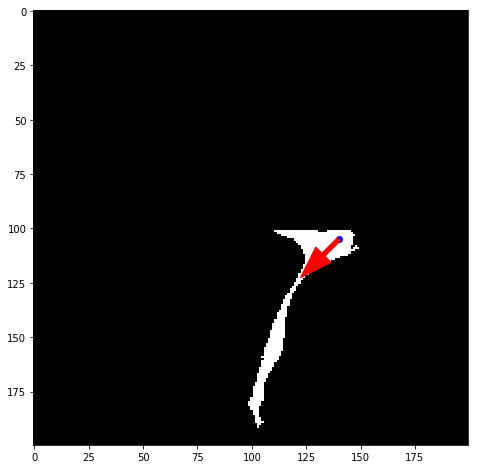

In [21]:
maped = np.copy(ground_truth)

for y in range(0, 200):
    for x in range(0, 200):
        if y > 100 and maped[y, x]==1 and x>75:
            maped[y, x] = 1
        else:
            maped[y, x] = 0

fig = plt.figure(figsize=(8,8))
plt.imshow(maped, cmap='gray')
plt.scatter(140, 105, c = 'b')

arrow_length = 10

# simulator yaw is counter-clockwise positive
yaw = np.pi * 5/4

x_arrow = arrow_length * np.cos(2*np.pi - yaw)
y_arrow = arrow_length * np.sin(2*np.pi - yaw)
plt.arrow(140, 105, x_arrow, y_arrow, color='red', zorder=2, head_width=10, width=2)

In [22]:
class Rover_state():
    def __init__(self):
        self.pos = None
        self.yaw = None
        self.worldmap = np.zeros((200, 200, 3), dtype=np.float)

Rover = Rover_state()
Rover.pos=[140, 105]
Rover.yaw=yaw
Rover.worldmap[:,:,2] = maped

Define the *rover_goal* function.

In [23]:
def rover_goal(Rover):

    xpos = Rover.pos[0]
    ypos = Rover.pos[1]
    yaw = Rover.yaw
    
    worldmap_naved = Rover.worldmap[:, :, 2]
    worldmap_mask = np.ones_like(worldmap_naved) - worldmap_naved

    # worldmap -> empty area
    # random select empty area, 
    # then calculate the vector with the origin of current position
    angles = np.zeros((200, 200))
    
    for y in range(0, 200):
        for x in range(0, 200):
            angles[y, x] = np.arctan2(y - ypos, x - xpos)
            if angles[y, x] < 0:
                angles[y, x]+=2*np.pi
    
    relative_angles = angles - yaw
    relative_angles = np.multiply(relative_angles, worldmap_mask)
    
    relative_angles_ = []
    for y in range(0, 200):
        for x in range(0, 200):
            if not relative_angles[y, x] == 0:
                relative_angles_.append(relative_angles[y, x])
            
    relative_angles_avg = np.mean(relative_angles_)
    print(relative_angles_avg)
    
    if relative_angles_avg > 0:
        goal = 'left'

    else:
        goal = 'right'
    
    return goal

The output should be *right* !

In [24]:
print(rover_goal(Rover))

-0.7086241622817823
right


We change the state of Rover and test the defined function under new conditions. 

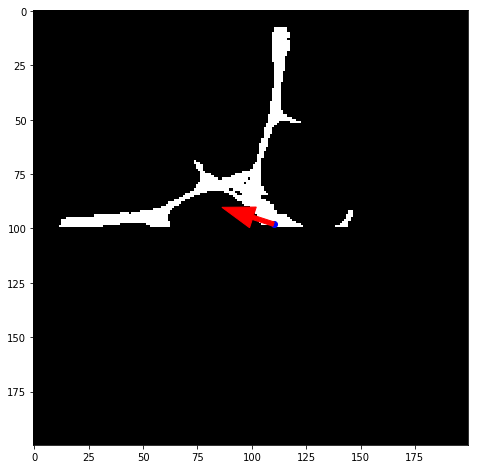

In [25]:
maped1 = np.copy(ground_truth)

for y in range(0, 200):
    for x in range(0, 200):
        if y < 100 and maped1[y, x]==1:
            maped1[y, x] = 1
        else:
            maped1[y, x] = 0

fig = plt.figure(figsize=(8,8))
plt.imshow(maped1, cmap='gray')
plt.scatter(110, 98, c = 'b')

arrow_length = 10

# simulator yaw is counter-clockwise positive
yaw = np.pi * 9/10

x_arrow = arrow_length * np.cos(2*np.pi - yaw)
y_arrow = arrow_length * np.sin(2*np.pi - yaw)
plt.arrow(110, 98, x_arrow, y_arrow, color='red', zorder=2, head_width=10, width=2)

In [26]:
Rover.pos=[110, 98]
Rover.yaw=yaw
Rover.worldmap[:,:,2] = maped1

The output should be *left* !

In [27]:
print(rover_goal(Rover))

0.26026424965543254
left
